## EXPLAINABLE AI Skin Cancer Detection explained with GRAD-CAM Activations

## About Melanoma

*Skin cancer is a major health problem, with over 5,000,000 cases being diagnosed every year. Melanoma is the deadliest form of skin cancer, responsible for a majority of skin cancer deaths. In 2015, the global incidence of melanoma was estimated to be over 350,000 cases, with almost 60,000 deaths. Although the mortality rate is alarming, when detected early, melanoma survival exceeds 95%.*

## About Dermoscopy

*As pigmented lesions occurring on the surface of the skin, melanoma is amenable to early detection by expert visual inspection. It is also amenable to automated detection with image analysis. Given the widespread availability of high-resolution cameras, algorithms that can improve our ability to screen and detect troublesome lesions can be of great value. As a result, many centers have begun their own research efforts on automated analysis. However, a centralized, coordinated, and comparative effort across institutions has yet to be implemented.*

*Dermoscopy is an imaging technique that eliminates the surface reflection of skin. By removing surface reflection, visualization of deeper levels of skin is enhanced. Prior research has shown that when used by expert dermatologists, dermoscopy provides improved diagnostic accuracy, in comparison to standard photography. As inexpensive consumer dermatoscope attachments for smart phones are beginning to reach the market, the opportunity for automated dermoscopic assessment algorithms to positively influence patient care increases.*

## Explainable AI

The application of AI systems in healthcare is a challenging task mainly because the factors involved in arriving at a decision by the machines are not explainable. Questions like, how did the machine arrive at this decision? or what did the machine see to predict the particular class of a condition? will always be asked to understand a machine’s way of taking the decisions in healthcare. 
Interpretability matters when machines take decisions on doctor’s behalf. For machines to arrive at a particular medical decision, health diagnostic or the treatment course, they have to be trustable. If machine based intelligent systems have to be integrated into the healthcare systems, their decisions have to be meaningful and transparent. The transparency on the thought process of such systems will help in the following ways - 
1.	When AI systems are weaker in the building phase, helps in building a robust system by identifying the failure reasons. 
2.	When AI systems are stable and achieved a certain SOTA result, transparency then will ensure that such systems are able to establish confidence on the healthcare personnel and the patients.
3.	When AI systems are powerful enough such that they are able to learn by their own experience, studying the machine’s ability of decision making may help healthcare professionals make better decisions themselves. 

Such transparency and explainability will only make it easier to integrate such smart intelligent systems with everyday healthcare applications and hospital workflows.


## References

**Dataset @** https://challenge2018.isic-archive.com/

1. Codella, N. et al. (2019) ‘Skin Lesion Analysis Toward Melanoma Detection 2018: A Challenge Hosted by the International Skin Imaging Collaboration (ISIC)’. Available at: http://arxiv.org/abs/1902.03368 (Accessed: 27 May 2021).

2. Tschandl, P., Rosendahl, C. and Kittler, H. (2018) ‘The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions’, Scientific Data, 5(1), p. 180161. doi: 10.1038/sdata.2018.161.

3. (François Chollet, 2020)
    François Chollet, (2020) Grad-CAM class activation visualization. 
    [online] Available at: https://keras.io/examples/vision/grad_cam/ [Accessed 20 Jun. 2020].
    
4. Selvaraju, R. R. et al. (2016) ‘Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization’. doi: 10.1007/s11263-019-01228-7.

In [1]:
# data config libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter

# display config libraries
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# openCV
import cv2

# tensorflow and keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg19 import VGG19

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import custom packages and utility files

from DataUtility import dataUtils
skinDataUtils = dataUtils()

from DataUtility import SKIN_CANCER_TUMOR_TYPE

from ModelTrainer import ModelTrainer
ModelTrainer = ModelTrainer()

from ModelValidator import ValidateModel
ValidateSkinCancerClassfier = ValidateModel()

## Image Data Exploration

### 1. Malignant Images

<br>

***Samples of the malignant (cancerous) tumors...***

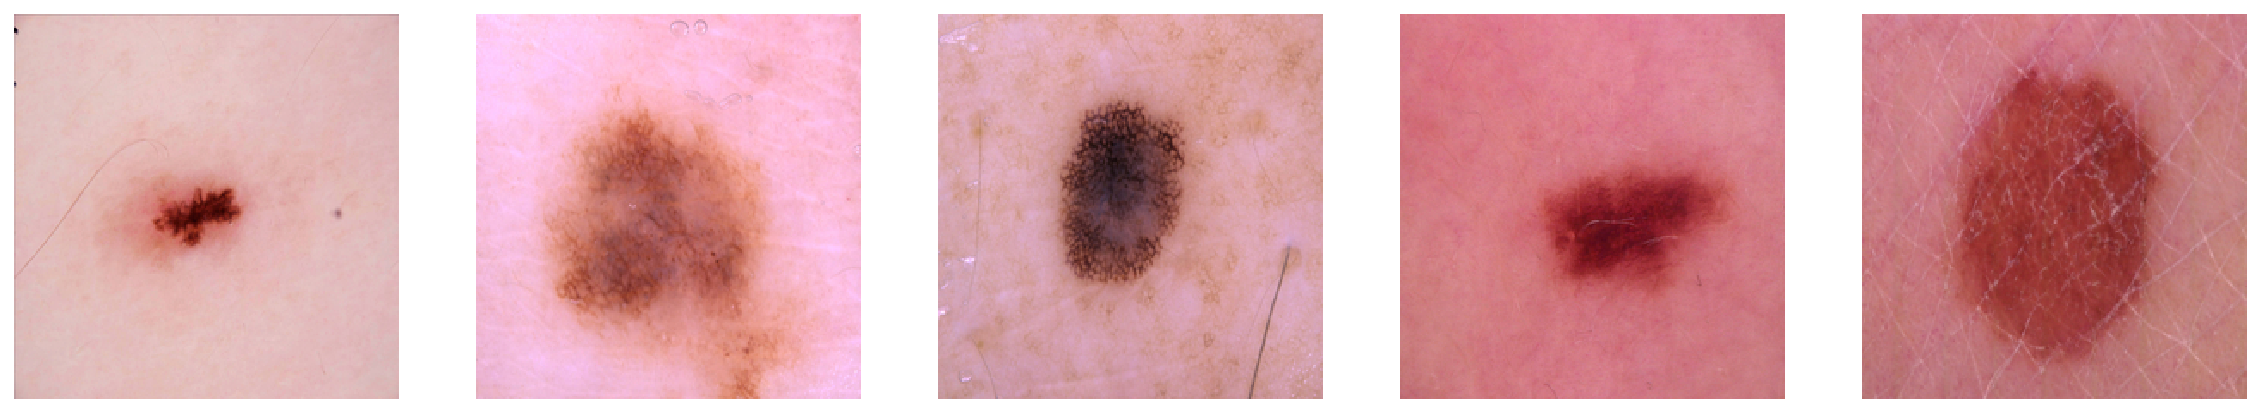

In [3]:
skinDataUtils.PrintMarkdownText('***Samples of the malignant (cancerous) tumors...***')
skinDataUtils.ReadAndDisplayInputImages(SKIN_CANCER_TUMOR_TYPE.BENIGN.value, 5)

### 2. Benign Images

<br>

***Samples of the benign (non-cancerous) tumors...***

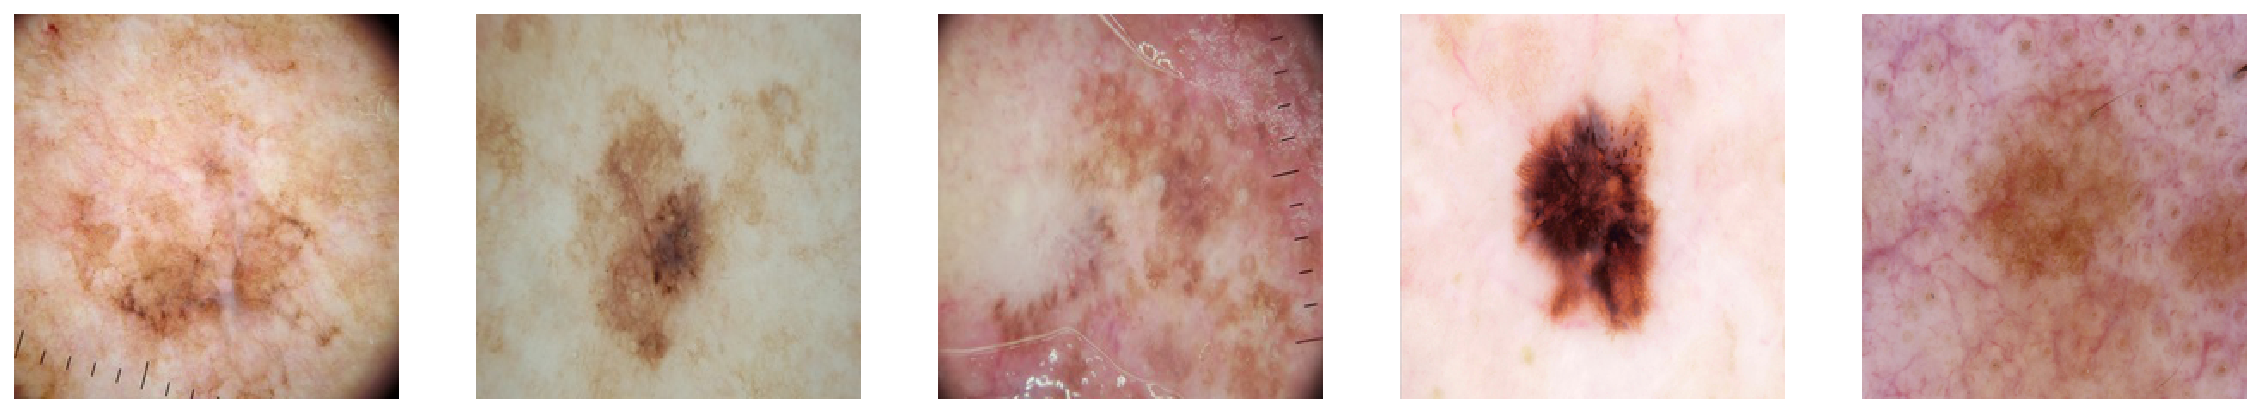

In [4]:
skinDataUtils.PrintMarkdownText('***Samples of the benign (non-cancerous) tumors...***')
skinDataUtils.ReadAndDisplayInputImages(SKIN_CANCER_TUMOR_TYPE.MALIGNANT.value, 5)

### Data Labelling

The images we have are un-labelled data. Deep learnins systems require proper annotated data to be able to learn the specific representations of each class and perform the job on unseen real time data. So, before proceeding with furtehr analysis we will first assign labels to our data. We have 2 class of images -

1. **Benign**

2. **Malignant**

***Malignant (cancerous)*** will be assigned values of 1 and ***Benign (non-cancerous)*** will be assigned the value 0.

In [5]:
skinCancer_df = skinDataUtils.GetLabelledSkinCancerData()

skinDataUtils.PrintMarkdownText('***Labelled skin cancer images...***')
skinCancer_df.head()

<br>

***Labelled skin cancer images...***

filename      label
0   ISIC Skin Cancer/images/malignant\507.jpg  Malignant
1  ISIC Skin Cancer/images/malignant\1465.jpg  Malignant
2      ISIC Skin Cancer/images/benign\820.jpg     Benign
3      ISIC Skin Cancer/images/benign\311.jpg     Benign
4  ISIC Skin Cancer/images/malignant\1068.jpg  Malignant

In [6]:
skinDataUtils.PrintMarkdownText('***Annotated skin cancer dataframe Info...***')
skinCancer_df.info()

<br>

***Annotated skin cancer dataframe Info...***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297 entries, 0 to 3296
Data columns (total 2 columns):
filename    3297 non-null object
label       3297 non-null object
dtypes: object(2)
memory usage: 51.6+ KB


<br>

***Sample Annotated Benign & Malignant Images...***

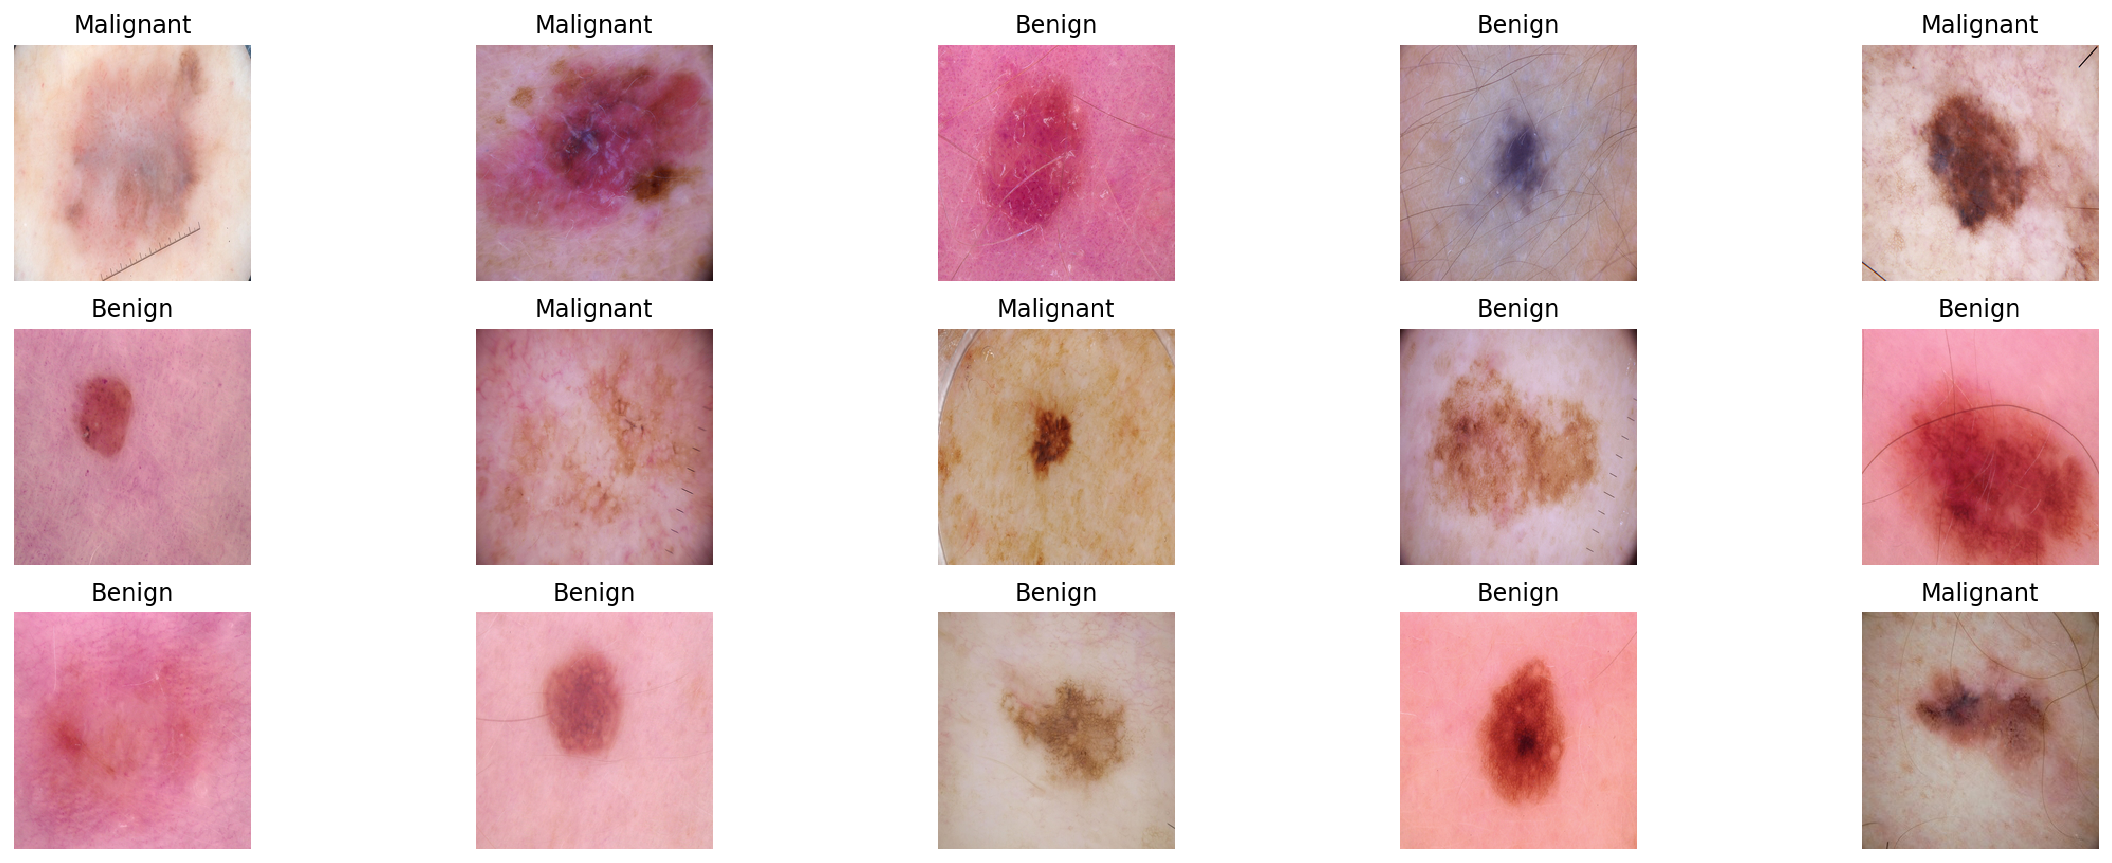

In [7]:
skinDataUtils.PrintMarkdownText('***Sample Annotated Benign & Malignant Images...***')
skinDataUtils.DisplayAnnotatedImages(skinCancer_df, 15)

## Image Dimensions

### 1. Malignant Images

In [8]:
skinDataUtils.PrintMarkdownText('***Shape Distribution for Malignant Images:***')
skinDataUtils.GetAllImageShape(SKIN_CANCER_TUMOR_TYPE.MALIGNANT.value)

<br>

***Shape Distribution for Malignant Images:***

Counter({(224, 224, 3): 1497})

### 2. Benign Images

In [9]:
skinDataUtils.PrintMarkdownText('***Shape Distribution for Benign Images:***')
skinDataUtils.GetAllImageShape(SKIN_CANCER_TUMOR_TYPE.BENIGN.value)

<br>

***Shape Distribution for Benign Images:***

Counter({(224, 224, 3): 1800})

All the images are of uniform dimension --> **(224, 224, 3)**

## Test Train Validation Split

In [10]:
# train - test split
train_files, test_files, train_labels, test_labels = train_test_split(skinCancer_df['filename'].values,
                                                                      skinCancer_df['label'].values, 
                                                                      test_size=0.15, random_state=42)

# train - validation split
train_files, validation_files, train_labels, validation_labels = train_test_split(train_files,
                                                                    train_labels, 
                                                                    test_size=0.10, random_state=42)

In [11]:
skinDataUtils.PrintMarkdownText('***Length of the generated datasets...***')

print(" -- Train Set Length: " + str(len(train_files)) + ' samples'
      "\n -- Validation Set Length: "  + str(len(validation_files)) + ' samples'
      "\n -- Test Set Length: " + str(len(test_files)) + ' samples')

<br>

***Length of the generated datasets...***

 -- Train Set Length: 2521 samples
 -- Validation Set Length: 281 samples
 -- Test Set Length: 495 samples


In [12]:
# Get the Tally of occurrences of the 2 labels in the generated datasets...

skinDataUtils.PrintMarkdownText('***Tally of occurrences of the 2 labels in the generated datasets...***')

print('Training Data:', Counter(train_labels), 
      '\n\nValidation Data:', Counter(validation_labels), 
      '\n\nTest Data:', Counter(test_labels))

<br>

***Tally of occurrences of the 2 labels in the generated datasets...***

Training Data: Counter({'Benign': 1385, 'Malignant': 1136}) 

Validation Data: Counter({'Benign': 164, 'Malignant': 117}) 

Test Data: Counter({'Benign': 251, 'Malignant': 244})


##  Load All Images 
### Train, Test and Validation

In [13]:
# skinDataUtils.ReadAllImages

train_data = skinDataUtils.ReadAllImages(imageList = train_files, resizeImage = True, newImageSize = (135, 135))
validation_data = skinDataUtils.ReadAllImages(imageList = validation_files, resizeImage = True, newImageSize = (135, 135))
test_data = skinDataUtils.ReadAllImages(imageList = test_files, resizeImage = True, newImageSize = (135, 135))

In [14]:
X_test = test_data / 255.

### Label Encoding

Encode categorical values **(`'Benign' & 'Malingant'`)** to convert to the machine readable and interpretable values which would be **Benign - 0** and **Malignant - 1**.

In [15]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(train_labels)

y_train = lbl_encoder.transform(train_labels)
y_validation = lbl_encoder.transform(validation_labels)
y_test = lbl_encoder.transform(test_labels)

skinDataUtils.PrintMarkdownText('***Categorical & Encoded Training Labels...***')
print("Categorical Train Labels:", list(train_labels[:5]), 
      "\n\nEncoded Train Labels:    ", y_train[:5])

<br>

***Categorical & Encoded Training Labels...***

Categorical Train Labels: ['Benign', 'Malignant', 'Benign', 'Malignant', 'Benign'] 

Encoded Train Labels:     [0 1 0 1 0]


## Model Training and Validation

In [16]:
# Training Parameters
BATCH_SIZE = 32
NUM_CLASSES = 2
EPOCHS = 30
INPUT_SHAPE = (135, 135, 3)

In [17]:
base_model = VGG19(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 135, 135, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 135, 135, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 135, 135, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 67, 67, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 67, 67, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 67, 67, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 33, 33, 128)       0     

In [18]:
for layer in base_model.layers:
    layer.trainable = False
    
output = Flatten()(base_model.output)
output = Dense(1024, activation = 'relu', input_dim = 512)(output)
output = Dense(512, activation = 'relu')(output)
output = Dense(256, activation = 'relu')(output)
output = Dense(128, activation = 'relu')(output)
output = Dense(64, activation = 'relu')(output)
output = Dense(1, activation = 'sigmoid')(output)

functional_model = Model(base_model.input, output, name = "SkinCancerDetection_VGG19_Model")

functional_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

functional_model.summary()

Model: "SkinCancerDetection_VGG19_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 135, 135, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 135, 135, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 135, 135, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 67, 67, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 67, 67, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 67, 67, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None,

In [19]:
CallBackList = ModelTrainer.GetCallBackList("SkinCancerDetection_VGG19_Model")
ModelTrainer.PrintModelCallBacks(CallBackList)

Model Checkpoint (.h5 file) Path: ./SkinCancerDetection_VGG19_Model.h5


<br>

***Model Callback List...***

1. <tensorflow.python.keras.callbacks.ModelCheckpoint object at 0x00000166C753FB00>
2. <tensorflow.python.keras.callbacks.EarlyStopping object at 0x00000166C753F0B8>
3. <tensorflow.python.keras.callbacks.ReduceLROnPlateau object at 0x00000166C753F6A0>


In [20]:
train_gen, val_gen = ModelTrainer.GetImageDataGenerators(train_data, y_train, validation_data, y_validation, BATCH_SIZE)

In [21]:
Model_Train_History = ModelTrainer.fit_generator(functional_model,
                                                 train_gen, 
                                                 EPOCHS, 
                                                 val_gen, 
                                                 CallBackList)

<br>

***Model Training Started...***

Epoch 1/30
78/78 [==============================] - 210s 3s/step - loss: 0.6234 - accuracy: 0.6722 - val_loss: 0.6910 - val_accuracy: 0.4492

Epoch 00001: val_loss improved from inf to 0.69096, saving model to .\SkinCancerDetection_VGG19_Model.h5
Epoch 2/30
78/78 [==============================] - 247s 3s/step - loss: 0.4907 - accuracy: 0.7642 - val_loss: 0.4993 - val_accuracy: 0.7422

Epoch 00002: val_loss improved from 0.69096 to 0.49929, saving model to .\SkinCancerDetection_VGG19_Model.h5
Epoch 3/30
78/78 [==============================] - 250s 3s/step - loss: 0.3889 - accuracy: 0.8280 - val_loss: 0.4158 - val_accuracy: 0.8086

Epoch 00003: val_loss improved from 0.49929 to 0.41582, saving model to .\SkinCancerDetection_VGG19_Model.h5
Epoch 4/30
78/78 [==============================] - 249s 3s/step - loss: 0.3964 - accuracy: 0.8140 - val_loss: 0.4208 - val_accuracy: 0.8008

Epoch 00004: val_loss did not improve from 0.41582
Epoch 5/30
78/78 [==============================] - 249s 3

### Model Testing

In [22]:
y_preds_probability, y_preds_binary = ValidateSkinCancerClassfier.GetModelPredictions(functional_model, X_test)

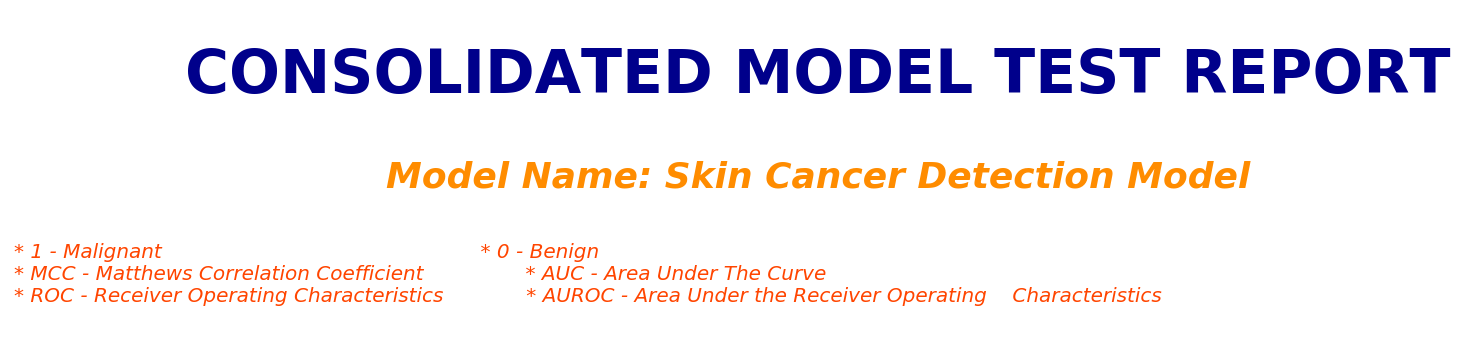

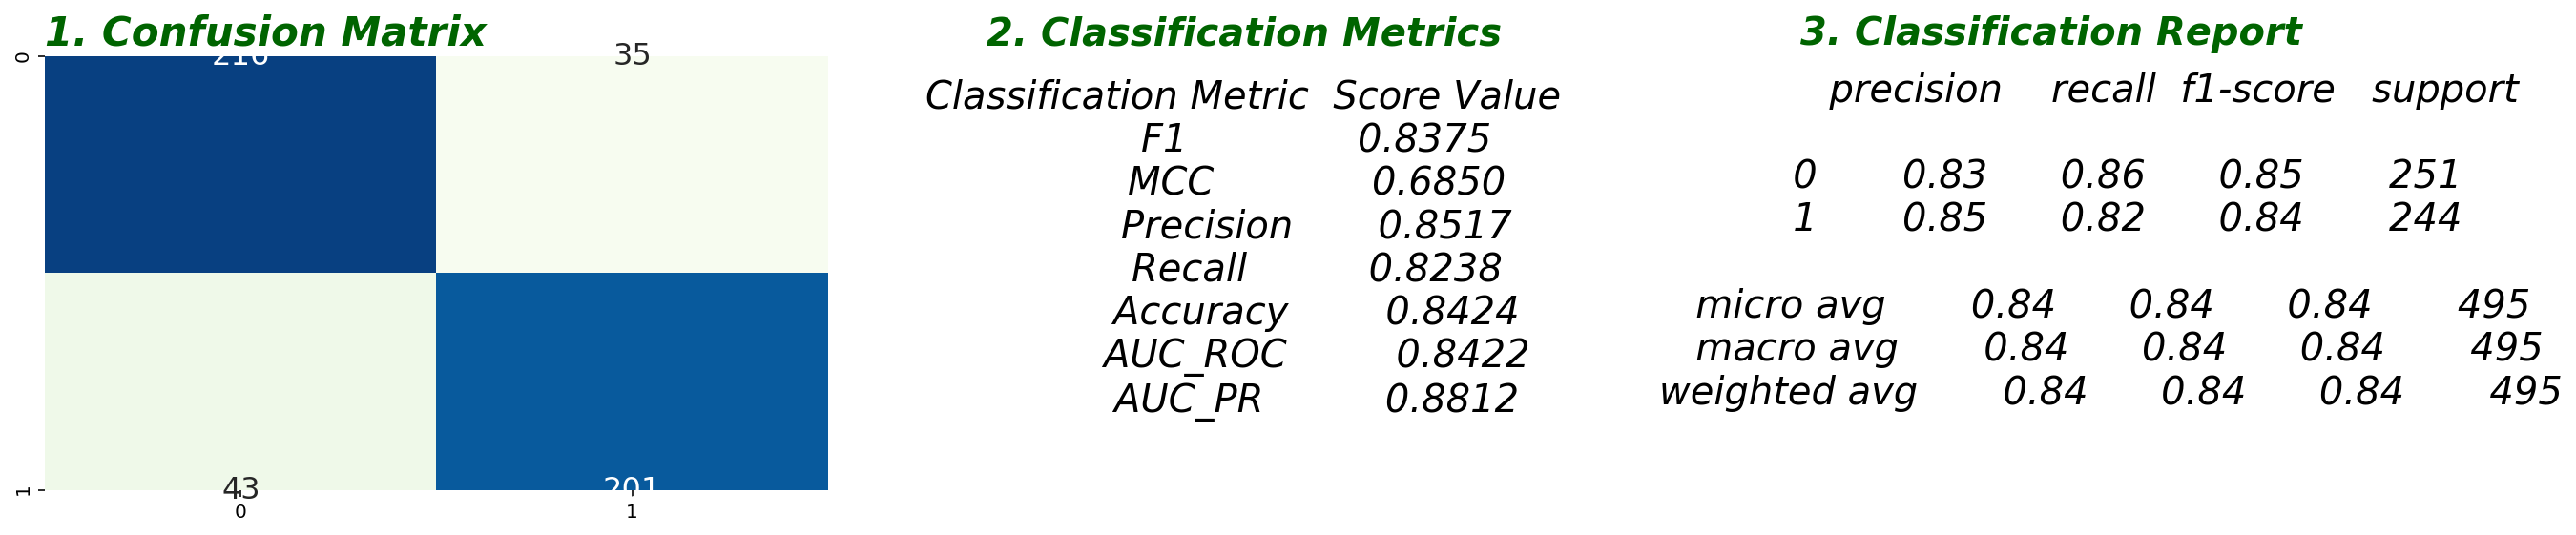

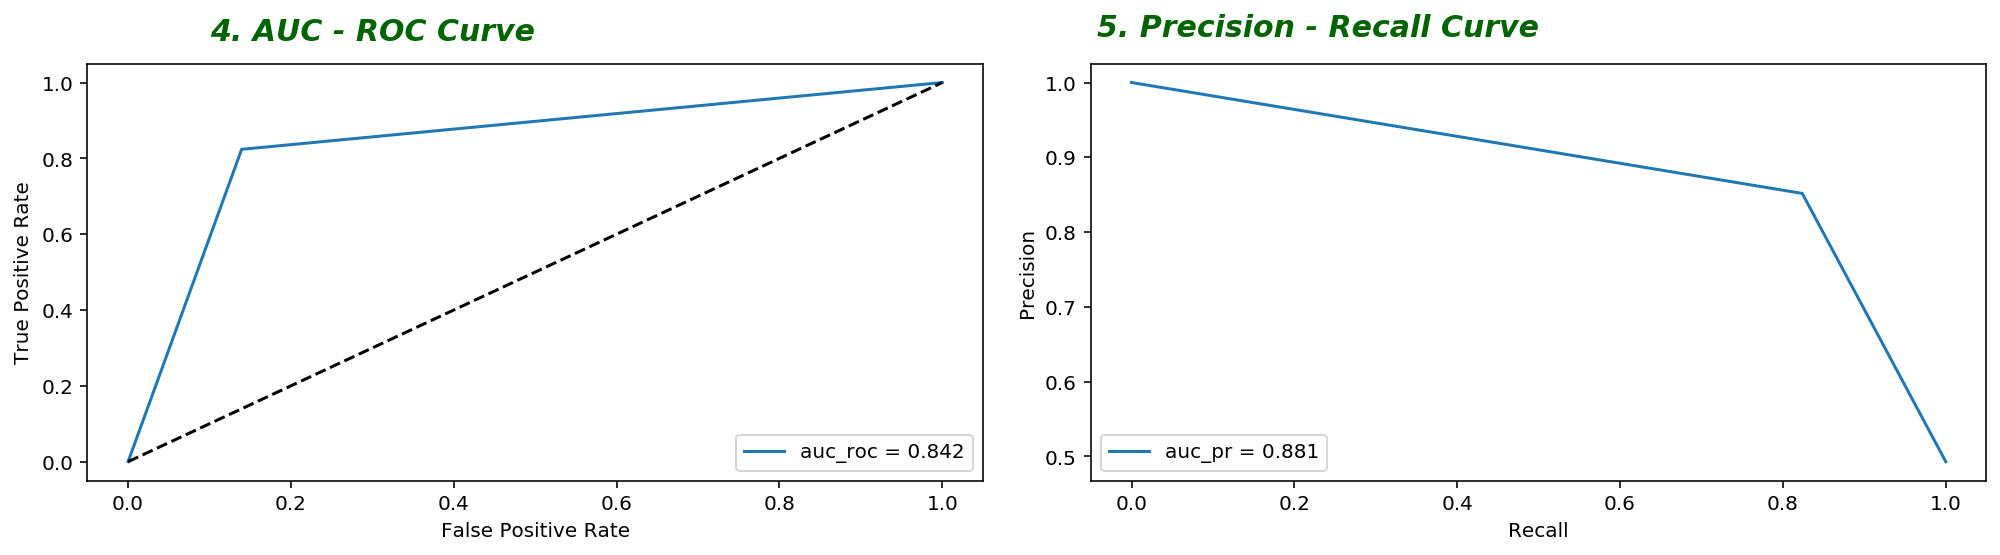

In [23]:
ValidateSkinCancerClassfier.Generate_Model_Test_Classification_Report(y_test, 
                                                                      y_preds_binary, 
                                                                      "Skin Cancer Detection Model")

<br>

***Model test results of 16 random test images...***

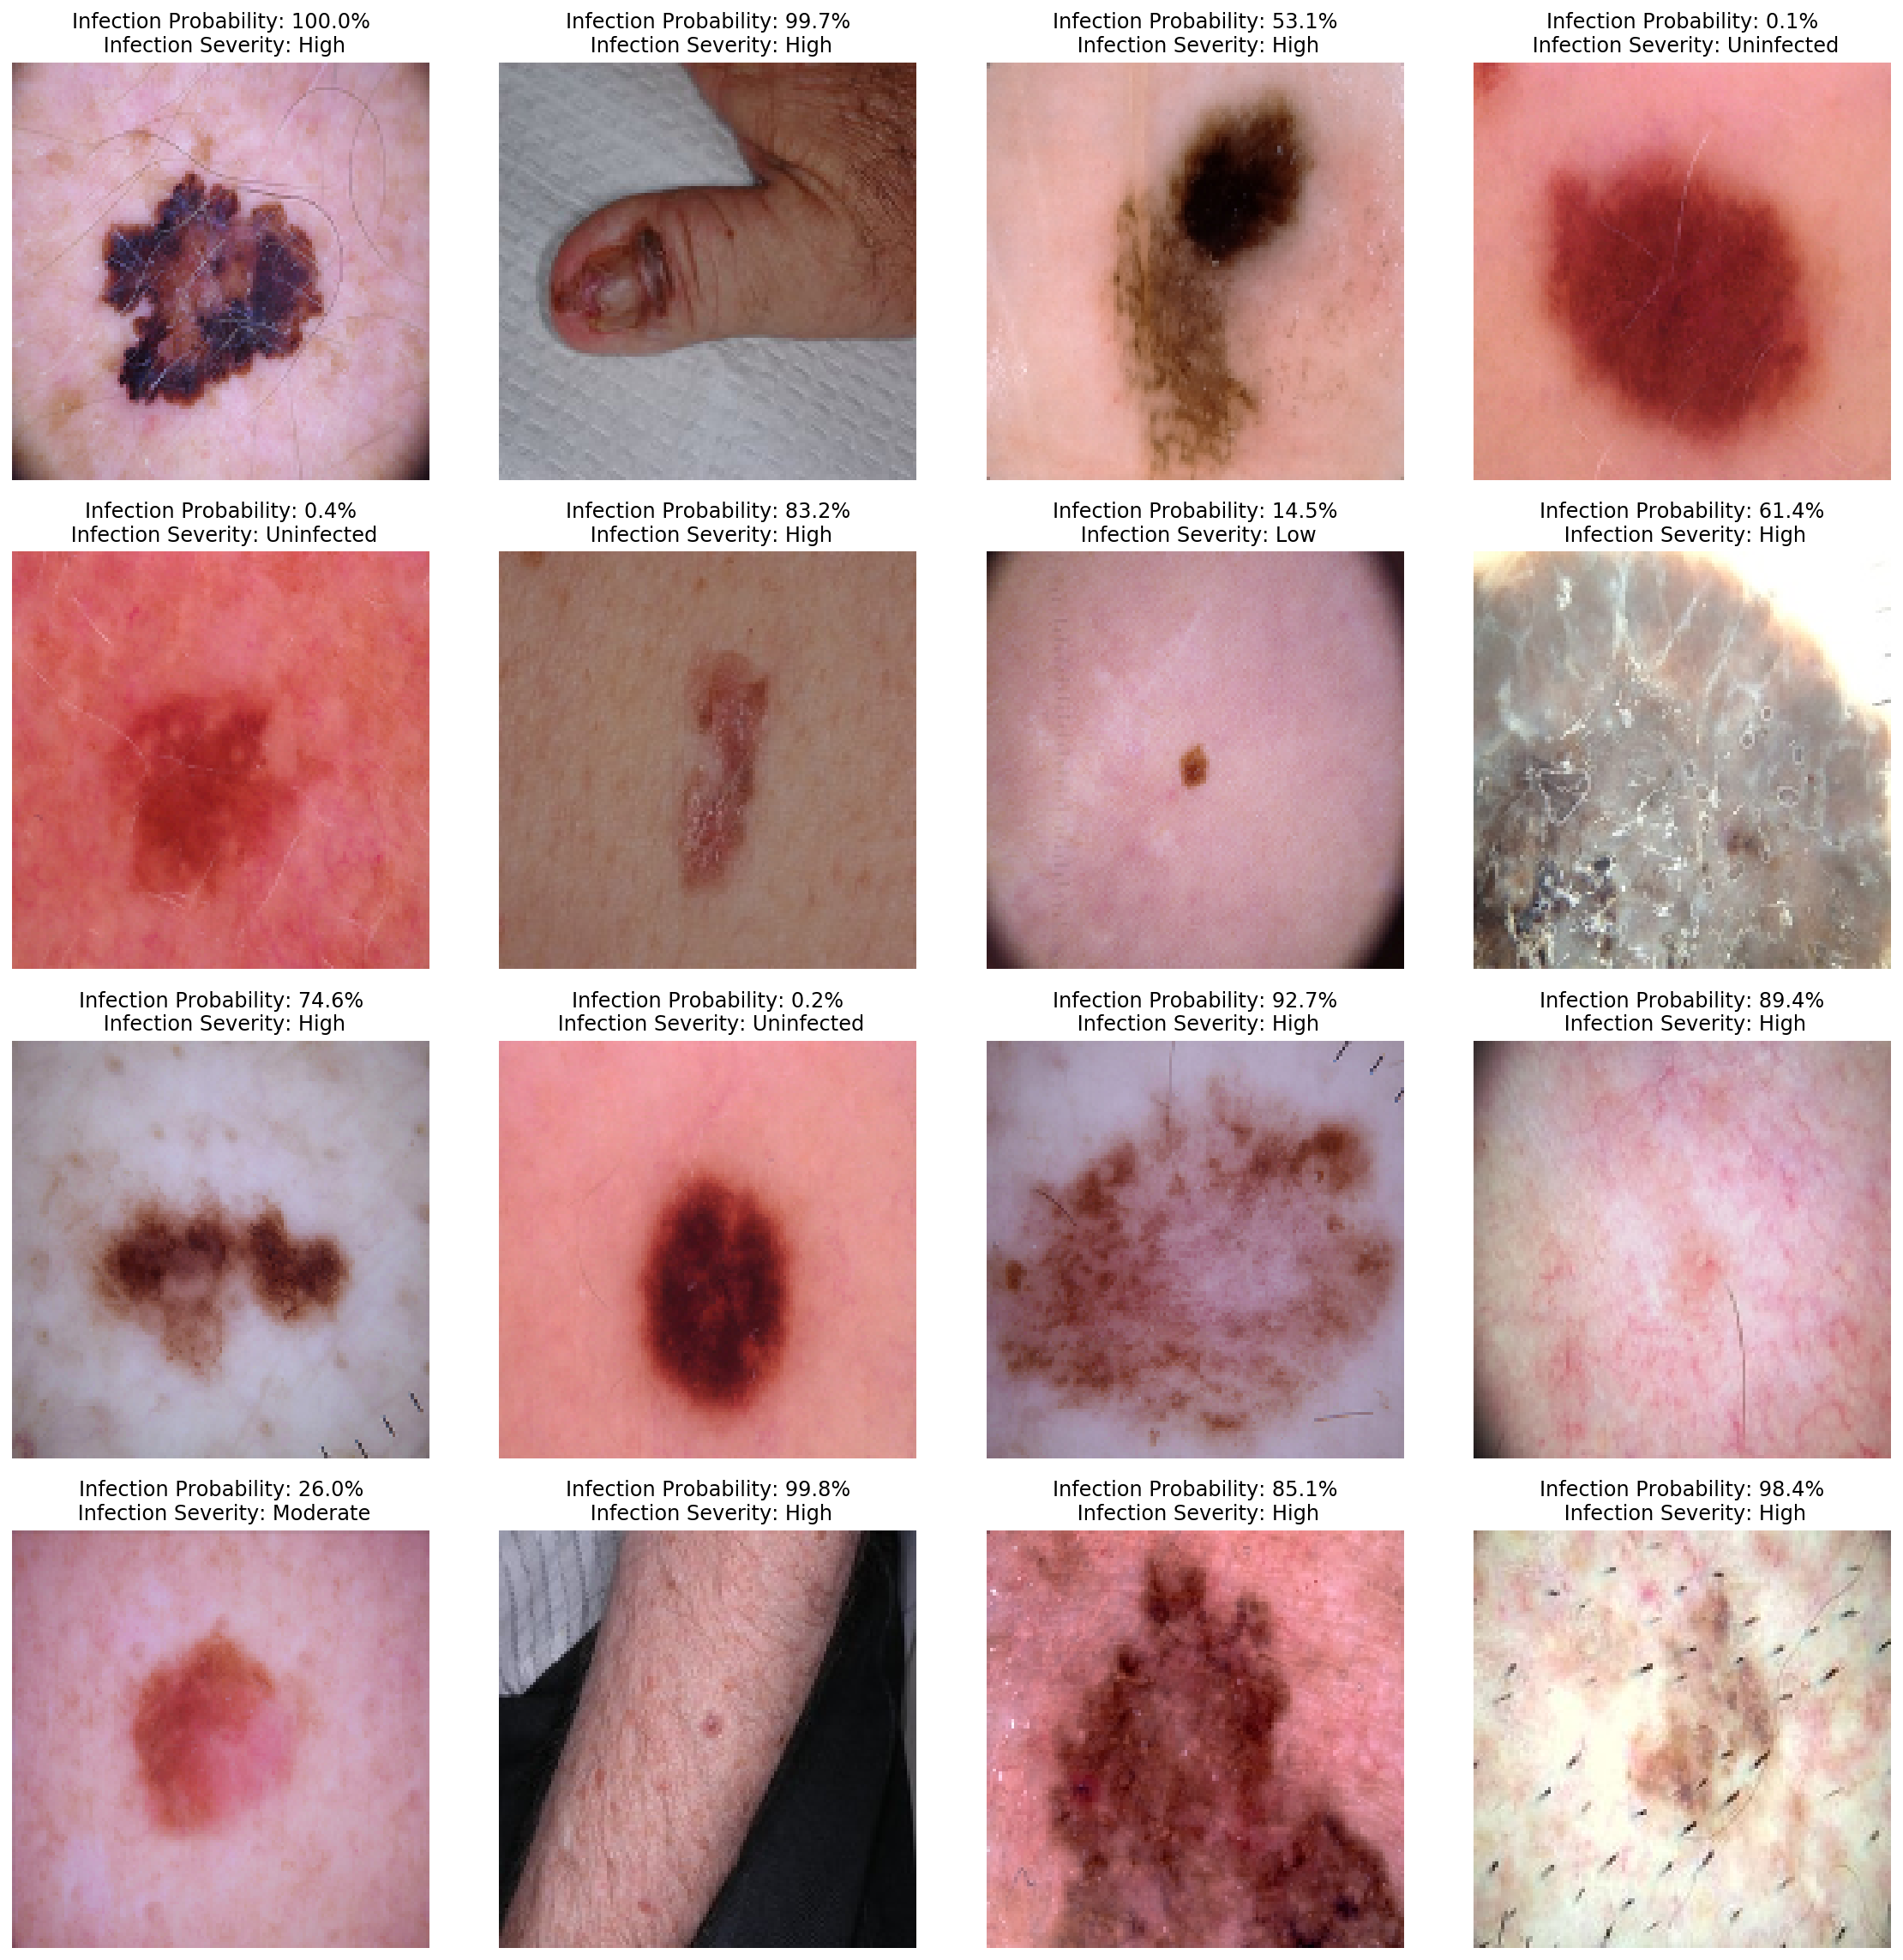

In [24]:
ValidateSkinCancerClassfier.PlotModelPredictionsOnRandomTestImages(X_test, y_test, y_preds_probability)

## Gradient - Class Activation Maps (GradCAM) - Viz

In [25]:
from GradCamUtility import GradCamUtils
gCam = GradCamUtils(functional_model, "block5_conv4")

Probability of the tumor being malignant is: 0.9908085


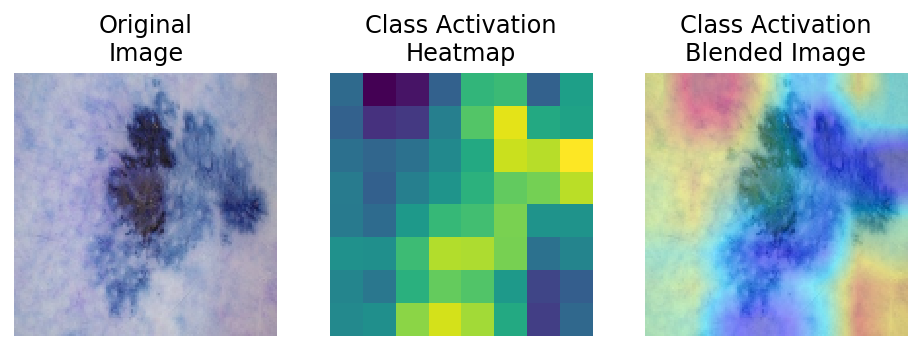

In [26]:
img = cv2.cvtColor(X_test[100], cv2.COLOR_BGR2RGB)
imgAsTensor = np.expand_dims(img, axis=0)

# get the probability of this tumor being malignant
probability = functional_model.predict(imgAsTensor)
print("Probability of the tumor being malignant is:", probability[0][0])

# generate the heatmap
heatmap = gCam.compute_heatmap(imgAsTensor)

# generate the superimposed images and display
superImposedImg = gCam.GetSuperImposedCAMImage(heatmap = heatmap, image = img)
gCam.DisplaySuperImposedImages(image = img, heatmap = heatmap, superimposed_img = superImposedImg)

Probability of the tumor being malignant is: 0.10282731


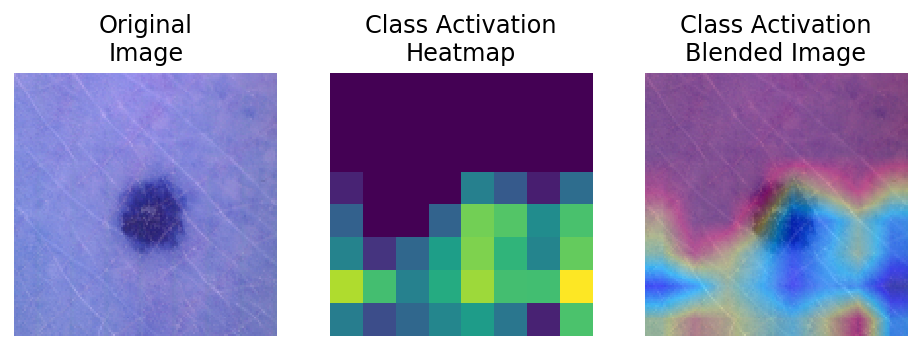

In [27]:
img = cv2.cvtColor(X_test[45], cv2.COLOR_BGR2RGB)
imgAsTensor = np.expand_dims(img, axis=0)

# get the probability of this tumor being malignant
probability = functional_model.predict(imgAsTensor)
print("Probability of the tumor being malignant is:", probability[0][0])

# generate the heatmap
heatmap = gCam.compute_heatmap(imgAsTensor)

# generate the superimposed images and display
superImposedImg = gCam.GetSuperImposedCAMImage(heatmap = heatmap, image = img)
gCam.DisplaySuperImposedImages(image = img, heatmap = heatmap, superimposed_img = superImposedImg)

Probability of the tumor being malignant is: 0.010695845


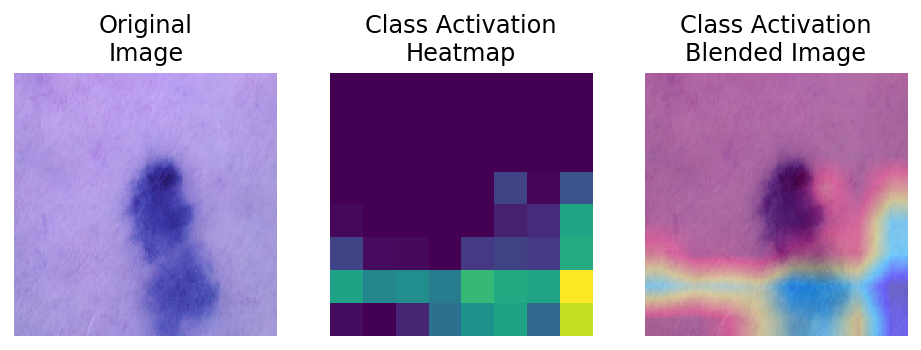

In [28]:
img = cv2.cvtColor(X_test[25], cv2.COLOR_BGR2RGB)
imgAsTensor = np.expand_dims(img, axis=0)

# get the probability of this tumor being malignant
probability = functional_model.predict(imgAsTensor)
print("Probability of the tumor being malignant is:", probability[0][0])

# generate the heatmap
heatmap = gCam.compute_heatmap(imgAsTensor)

# generate the superimposed images and display
superImposedImg = gCam.GetSuperImposedCAMImage(heatmap = heatmap, image = img)
gCam.DisplaySuperImposedImages(image = img, heatmap = heatmap, superimposed_img = superImposedImg)

Probability of the tumor being malignant is: 0.9586465


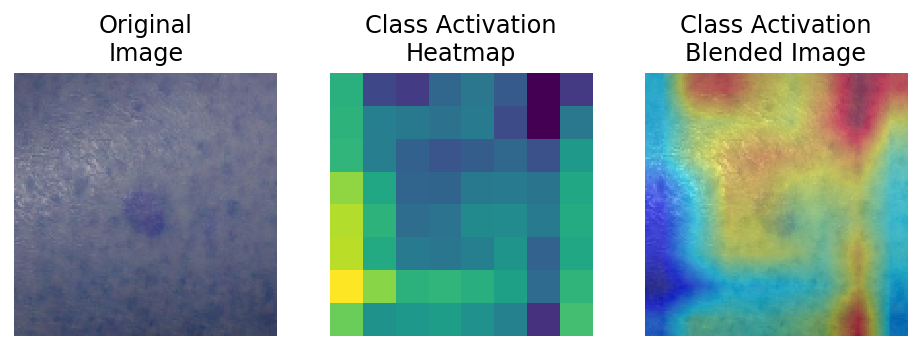

In [29]:
img = cv2.cvtColor(X_test[32], cv2.COLOR_BGR2RGB)
imgAsTensor = np.expand_dims(img, axis=0)

# get the probability of this tumor being malignant
probability = functional_model.predict(imgAsTensor)
print("Probability of the tumor being malignant is:", probability[0][0])

# generate the heatmap
heatmap = gCam.compute_heatmap(imgAsTensor)

# generate the superimposed images and display
superImposedImg = gCam.GetSuperImposedCAMImage(heatmap = heatmap, image = img)
gCam.DisplaySuperImposedImages(image = img, heatmap = heatmap, superimposed_img = superImposedImg)

## Inferences

The visualizations seen in the images above, show the original image and the up-sampled heatmap. The blended image shows that the heatmap coincides with the location of the tumor while having good amount of intensity at the tumor location. 
However, it can also be seen that the Grad-CAM heatmaps may not always .capture the object of interest in its entirety.

Grda-CAM technique is not limited to any particular kind of CNN architecture or layer and can work on any type of CNN architectures involving any category of layers provided the activations obtained from the layers are differentiable to compute the gradients.